In [16]:
using DelimitedFiles 
using PyPlot
using Printf
import FlowFarm; const ff = FlowFarm
using BenchmarkTools

# Amalia

## 36 directions

### Set Up

In [41]:
# include case information
include("./inputfiles/model_set_10_amalia_wind_park_36dir.jl");

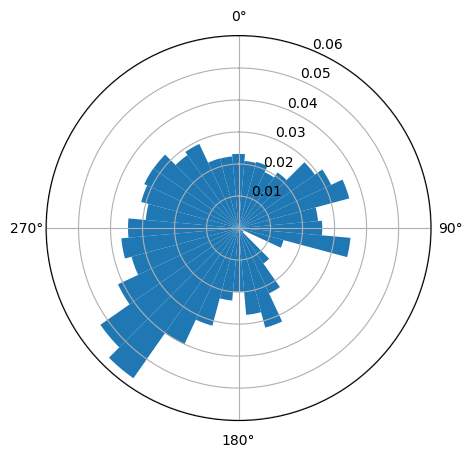

In [42]:
# plot wind rose
theta = winddirections
dtheta = 90
width = theta[2]-theta[1]
r = windprobabilities
fig = figure("pyplot_windrose_barplot",figsize=(5,5)) # Create a new figure
ax = PyPlot.axes(polar="true") # Create a polar axis
# PyPlot.title("Wind Rose - Bar")
b = bar(theta,r,width=width) # Bar plot

ax.set_thetagrids(collect(0:dtheta:360-dtheta)) # Show grid lines from 0 to 360 in increments of dtheta
ax.set_theta_zero_location("N") # Set 0 degrees to the top of the plot
ax.set_theta_direction(-1) # Switch to clockwise
fig.canvas.draw() # Update the figure
savefig("windrose_amalia_36dir_probability.pdf")

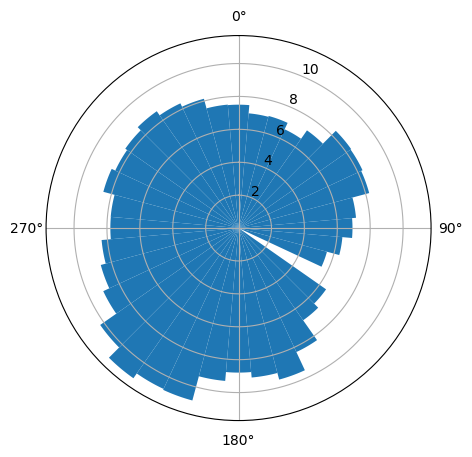

In [43]:
# plot wind rose
theta = winddirections
dtheta = 90
width = theta[2]-theta[1]
r = windspeeds
fig = figure("pyplot_windrose_barplot",figsize=(5,5)) # Create a new figure
ax = PyPlot.axes(polar="true") # Create a polar axis
# PyPlot.title("Wind Rose - Bar")
b = bar(theta,r,width=width) # Bar plot

ax.set_thetagrids(collect(0:dtheta:360-dtheta)) # Show grid lines from 0 to 360 in increments of dtheta
ax.set_theta_zero_location("N") # Set 0 degrees to the top of the plot
ax.set_theta_direction(-1) # Switch to clockwise
fig.canvas.draw() # Update the figure
savefig("windrose_amalia_36dir_speeds.pdf")

### Run TIP Model

In [18]:
AEPTIP = ff.tip_get_aep(turbine_x,turbine_y,wind_data,cpdata,ctdata, pstep=0.01, prated=rated_power[1], u_cut_in=cut_in_speed[1], u_cut_out=cut_out_speed[1], density=air_density, r0=diam/2.0, alpha=0.01)


3.629973597816072e11

In [19]:
@benchmark ff.tip_get_aep(turbine_x,turbine_y,wind_data,cpdata,ctdata, pstep=0.01, prated=rated_power[1], u_cut_in=cut_in_speed[1], u_cut_out=cut_out_speed[1], density=air_density, r0=diam/2.0, alpha=0.01)


BenchmarkTools.Trial: 
  memory estimate:  2.62 MiB
  allocs estimate:  18052
  --------------
  minimum time:     3.216 ms (0.00% GC)
  median time:      3.299 ms (0.00% GC)
  mean time:        3.537 ms (5.21% GC)
  maximum time:     9.726 ms (45.44% GC)
  --------------
  samples:          1412
  evals/sample:     1

### Run FLOWFarm - Jensen TopHat Model

In [20]:
wakedeficitmodel = ff.JensenTopHat()
wakedeflectionmodel = ff.JiminezYawDeflection()
wakecombinationmodel = ff.SumOfSquaresLocalVelocitySuperposition()
localtimodel = ff.LocalTIModelNoLocalTI()
model_set = ff.WindFarmModelSet(wakedeficitmodel, wakedeflectionmodel, wakecombinationmodel, localtimodel)

AEPJTH = ff.calculate_aep(turbine_x, turbine_y, turbine_z, rotor_diameter,
                hub_height, turbine_yaw, ct_models, generator_efficiency, cut_in_speed,
                cut_out_speed, rated_speed, rated_power, windresource, power_models, model_set,
                rotor_sample_points_y=rotor_points_y,rotor_sample_points_z=rotor_points_z)

4.232630258536231e11

In [21]:
@benchmark ff.calculate_aep(turbine_x, turbine_y, turbine_z, rotor_diameter,
                hub_height, turbine_yaw, ct_models, generator_efficiency, cut_in_speed,
                cut_out_speed, rated_speed, rated_power, windresource, power_models, model_set,
                rotor_sample_points_y=rotor_points_y,rotor_sample_points_z=rotor_points_z)

BenchmarkTools.Trial: 
  memory estimate:  247.36 KiB
  allocs estimate:  612
  --------------
  minimum time:     7.571 ms (0.00% GC)
  median time:      8.017 ms (0.00% GC)
  mean time:        8.379 ms (0.08% GC)
  maximum time:     14.069 ms (0.00% GC)
  --------------
  samples:          596
  evals/sample:     1

### Run FLOWFarm - Jensen Cosine Model

In [22]:
wakedeficitmodel = ff.JensenCosine()
wakedeflectionmodel = ff.JiminezYawDeflection()
wakecombinationmodel = ff.SumOfSquaresLocalVelocitySuperposition()
localtimodel = ff.LocalTIModelNoLocalTI()
model_set = ff.WindFarmModelSet(wakedeficitmodel, wakedeflectionmodel, wakecombinationmodel, localtimodel)

AEPJC = ff.calculate_aep(turbine_x, turbine_y, turbine_z, rotor_diameter,
                hub_height, turbine_yaw, ct_models, generator_efficiency, cut_in_speed,
                cut_out_speed, rated_speed, rated_power, windresource, power_models, model_set,
                rotor_sample_points_y=rotor_points_y,rotor_sample_points_z=rotor_points_z)

2.295498187292309e11

In [23]:
@benchmark ff.calculate_aep(turbine_x, turbine_y, turbine_z, rotor_diameter,
                hub_height, turbine_yaw, ct_models, generator_efficiency, cut_in_speed,
                cut_out_speed, rated_speed, rated_power, windresource, power_models, model_set,
                rotor_sample_points_y=rotor_points_y,rotor_sample_points_z=rotor_points_z)

BenchmarkTools.Trial: 
  memory estimate:  247.31 KiB
  allocs estimate:  611
  --------------
  minimum time:     10.802 ms (0.00% GC)
  median time:      11.129 ms (0.00% GC)
  mean time:        11.238 ms (0.05% GC)
  maximum time:     15.180 ms (0.00% GC)
  --------------
  samples:          445
  evals/sample:     1

### Run FLOWFarm - Bastankhah Model

In [24]:
wakedeficitmodel = ff.GaussYaw()
wakedeflectionmodel = ff.GaussYawDeflection()
wakecombinationmodel = ff.LinearLocalVelocitySuperposition()
localtimodel = ff.LocalTIModelMaxTI()
model_set = ff.WindFarmModelSet(wakedeficitmodel, wakedeflectionmodel, wakecombinationmodel, localtimodel)

AEPB = ff.calculate_aep(turbine_x, turbine_y, turbine_z, rotor_diameter,
                hub_height, turbine_yaw, ct_models, generator_efficiency, cut_in_speed,
                cut_out_speed, rated_speed, rated_power, windresource, power_models, model_set,
                rotor_sample_points_y=rotor_points_y,rotor_sample_points_z=rotor_points_z)

3.541488957719515e11

In [25]:
@benchmark ff.calculate_aep(turbine_x, turbine_y, turbine_z, rotor_diameter,
                hub_height, turbine_yaw, ct_models, generator_efficiency, cut_in_speed,
                cut_out_speed, rated_speed, rated_power, windresource, power_models, model_set,
                rotor_sample_points_y=rotor_points_y,rotor_sample_points_z=rotor_points_z)

BenchmarkTools.Trial: 
  memory estimate:  247.31 KiB
  allocs estimate:  611
  --------------
  minimum time:     19.072 ms (0.00% GC)
  median time:      19.377 ms (0.00% GC)
  mean time:        19.514 ms (0.03% GC)
  maximum time:     23.684 ms (0.00% GC)
  --------------
  samples:          257
  evals/sample:     1

### Run FLOWFarm MultiZone Model

In [26]:
wakedeficitmodel = ff.Multizone()
wakedeflectionmodel = ff.JiminezYawDeflection()
wakecombinationmodel = ff.SumOfSquaresLocalVelocitySuperposition()
localtimodel = ff.LocalTIModelNoLocalTI()
model_set = ff.WindFarmModelSet(wakedeficitmodel, wakedeflectionmodel, wakecombinationmodel, localtimodel)

AEPM = ff.calculate_aep(turbine_x, turbine_y, turbine_z, rotor_diameter,
                hub_height, turbine_yaw, ct_models, generator_efficiency, cut_in_speed,
                cut_out_speed, rated_speed, rated_power, windresource, power_models, model_set,
                rotor_sample_points_y=rotor_points_y,rotor_sample_points_z=rotor_points_z)

4.386402456806085e11

In [27]:
@benchmark ff.calculate_aep(turbine_x, turbine_y, turbine_z, rotor_diameter,
                hub_height, turbine_yaw, ct_models, generator_efficiency, cut_in_speed,
                cut_out_speed, rated_speed, rated_power, windresource, power_models, model_set,
                rotor_sample_points_y=rotor_points_y,rotor_sample_points_z=rotor_points_z)

BenchmarkTools.Trial: 
  memory estimate:  13.85 MiB
  allocs estimate:  128023
  --------------
  minimum time:     13.357 ms (0.00% GC)
  median time:      15.316 ms (0.00% GC)
  mean time:        16.386 ms (5.89% GC)
  maximum time:     42.133 ms (9.44% GC)
  --------------
  samples:          305
  evals/sample:     1

### Compare TIP vs TopHat

In [28]:
ErrorTIPvsTopHat = 100*(AEPTIP-AEPJTH)/AEPJTH
ErrorTIPvsCosine = 100*(AEPTIP-AEPJC)/AEPJC
ErrorTIPvsMultizone = 100*(AEPTIP-AEPM)/AEPM
ErrorTIPvsBastankhah = 100*(AEPTIP-AEPB)/AEPB
println("TIP AEP: ", AEPTIP)
println("Jensen Top Hat AEP:   ", AEPJTH)
println("Jensen Cosine AEP:   ", AEPJC)
println("Multi-Zone AEP:   ", AEPM)
println("Bastankhah AEP:   ", AEPB)
@printf("Error vs Jensen Top Hat:  %.2f%%\n", ErrorTIPvsTopHat)
@printf("Error vs Jensen Cosine:   %.2f%%\n", ErrorTIPvsCosine)
@printf("Error vs Multi-Zone:  %.2f%%\n", ErrorTIPvsMultizone)
@printf("Error vs Bastankhah:   %.2f%%\n", ErrorTIPvsBastankhah)

TIP AEP: 3.629973597816072e11
Jensen Top Hat AEP:   4.232630258536231e11
Jensen Cosine AEP:   2.295498187292309e11
Multi-Zone AEP:   4.386402456806085e11
Bastankhah AEP:   3.541488957719515e11
Error vs Jensen Top Hat:  -14.24%
Error vs Jensen Cosine:   58.13%
Error vs Multi-Zone:  -17.24%
Error vs Bastankhah:   2.50%


## 72 directions

### Set Up

In [44]:
# include case information
include("./inputfiles/model_set_10_amalia_wind_park_72dir.jl");

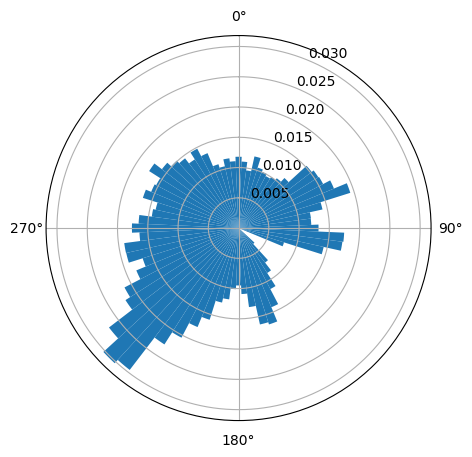

In [45]:
# plot wind rose
theta = winddirections
dtheta = 90
width = theta[2]-theta[1]
r = windprobabilities
fig = figure("pyplot_windrose_barplot",figsize=(5,5)) # Create a new figure
ax = PyPlot.axes(polar="true") # Create a polar axis
# PyPlot.title("Wind Rose - Bar")
b = bar(theta,r,width=width) # Bar plot

ax.set_thetagrids(collect(0:dtheta:360-dtheta)) # Show grid lines from 0 to 360 in increments of dtheta
ax.set_theta_zero_location("N") # Set 0 degrees to the top of the plot
ax.set_theta_direction(-1) # Switch to clockwise
fig.canvas.draw() # Update the figure
savefig("windrose_amalia_72dir_probability.pdf")

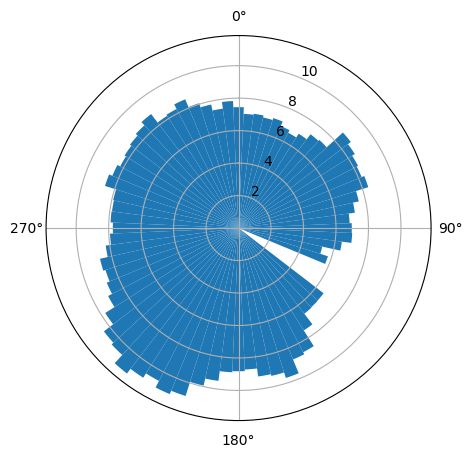

In [46]:
# plot wind rose
theta = winddirections
dtheta = 90
width = theta[2]-theta[1]
r = windspeeds
fig = figure("pyplot_windrose_barplot",figsize=(5,5)) # Create a new figure
ax = PyPlot.axes(polar="true") # Create a polar axis
# PyPlot.title("Wind Rose - Bar")
b = bar(theta,r,width=width) # Bar plot

ax.set_thetagrids(collect(0:dtheta:360-dtheta)) # Show grid lines from 0 to 360 in increments of dtheta
ax.set_theta_zero_location("N") # Set 0 degrees to the top of the plot
ax.set_theta_direction(-1) # Switch to clockwise
fig.canvas.draw() # Update the figure
savefig("windrose_amalia_72dir_speeds.pdf")

### Run TIP Model

In [30]:
AEPTIP = ff.tip_get_aep(turbine_x,turbine_y,wind_data,cpdata,ctdata, pstep=0.01, prated=rated_power[1], u_cut_in=cut_in_speed[1], u_cut_out=cut_out_speed[1], density=air_density, r0=diam/2.0, alpha=0.01)

9.132870338802345e11

In [31]:
@benchmark ff.tip_get_aep(turbine_x,turbine_y,wind_data,cpdata,ctdata, pstep=0.01, prated=rated_power[1], u_cut_in=cut_in_speed[1], u_cut_out=cut_out_speed[1], density=air_density, r0=diam/2.0, alpha=0.01)

BenchmarkTools.Trial: 
  memory estimate:  3.67 MiB
  allocs estimate:  18052
  --------------
  minimum time:     3.403 ms (0.00% GC)
  median time:      3.526 ms (0.00% GC)
  mean time:        3.836 ms (6.83% GC)
  maximum time:     8.224 ms (45.88% GC)
  --------------
  samples:          1301
  evals/sample:     1

### Run FLOWFarm - Jensen TopHat Model

In [32]:
wakedeficitmodel = ff.JensenTopHat()
wakedeflectionmodel = ff.JiminezYawDeflection()
wakecombinationmodel = ff.SumOfSquaresLocalVelocitySuperposition()
localtimodel = ff.LocalTIModelNoLocalTI()
model_set = ff.WindFarmModelSet(wakedeficitmodel, wakedeflectionmodel, wakecombinationmodel, localtimodel)

AEPJTH = ff.calculate_aep(turbine_x, turbine_y, turbine_z, rotor_diameter,
                hub_height, turbine_yaw, ct_models, generator_efficiency, cut_in_speed,
                cut_out_speed, rated_speed, rated_power, windresource, power_models, model_set,
                rotor_sample_points_y=rotor_points_y,rotor_sample_points_z=rotor_points_z)

9.884343051400442e11

In [33]:
@benchmark ff.calculate_aep(turbine_x, turbine_y, turbine_z, rotor_diameter,
                hub_height, turbine_yaw, ct_models, generator_efficiency, cut_in_speed,
                cut_out_speed, rated_speed, rated_power, windresource, power_models, model_set,
                rotor_sample_points_y=rotor_points_y,rotor_sample_points_z=rotor_points_z)

BenchmarkTools.Trial: 
  memory estimate:  492.61 KiB
  allocs estimate:  1188
  --------------
  minimum time:     15.354 ms (0.00% GC)
  median time:      15.731 ms (0.00% GC)
  mean time:        15.903 ms (0.08% GC)
  maximum time:     18.715 ms (0.00% GC)
  --------------
  samples:          315
  evals/sample:     1

### Run FLOWFarm - Jensen Cosine Model

In [34]:
wakedeficitmodel = ff.JensenCosine()
wakedeflectionmodel = ff.JiminezYawDeflection()
wakecombinationmodel = ff.SumOfSquaresLocalVelocitySuperposition()
localtimodel = ff.LocalTIModelNoLocalTI()
model_set = ff.WindFarmModelSet(wakedeficitmodel, wakedeflectionmodel, wakecombinationmodel, localtimodel)

AEPJC = ff.calculate_aep(turbine_x, turbine_y, turbine_z, rotor_diameter,
                hub_height, turbine_yaw, ct_models, generator_efficiency, cut_in_speed,
                cut_out_speed, rated_speed, rated_power, windresource, power_models, model_set,
                rotor_sample_points_y=rotor_points_y,rotor_sample_points_z=rotor_points_z)

5.040595970872434e11

In [35]:
@benchmark ff.calculate_aep(turbine_x, turbine_y, turbine_z, rotor_diameter,
                hub_height, turbine_yaw, ct_models, generator_efficiency, cut_in_speed,
                cut_out_speed, rated_speed, rated_power, windresource, power_models, model_set,
                rotor_sample_points_y=rotor_points_y,rotor_sample_points_z=rotor_points_z)

BenchmarkTools.Trial: 
  memory estimate:  492.56 KiB
  allocs estimate:  1187
  --------------
  minimum time:     21.782 ms (0.00% GC)
  median time:      23.289 ms (0.00% GC)
  mean time:        28.787 ms (0.03% GC)
  maximum time:     99.405 ms (0.00% GC)
  --------------
  samples:          174
  evals/sample:     1

### Run FLOWFarm - Bastankhah Model

In [36]:
wakedeficitmodel = ff.GaussYaw()
wakedeflectionmodel = ff.GaussYawDeflection()
wakecombinationmodel = ff.LinearLocalVelocitySuperposition()
localtimodel = ff.LocalTIModelMaxTI()
model_set = ff.WindFarmModelSet(wakedeficitmodel, wakedeflectionmodel, wakecombinationmodel, localtimodel)

AEPB = ff.calculate_aep(turbine_x, turbine_y, turbine_z, rotor_diameter,
                hub_height, turbine_yaw, ct_models, generator_efficiency, cut_in_speed,
                cut_out_speed, rated_speed, rated_power, windresource, power_models, model_set,
                rotor_sample_points_y=rotor_points_y,rotor_sample_points_z=rotor_points_z)

7.295660197903009e11

In [37]:
@benchmark ff.calculate_aep(turbine_x, turbine_y, turbine_z, rotor_diameter,
                hub_height, turbine_yaw, ct_models, generator_efficiency, cut_in_speed,
                cut_out_speed, rated_speed, rated_power, windresource, power_models, model_set,
                rotor_sample_points_y=rotor_points_y,rotor_sample_points_z=rotor_points_z)

BenchmarkTools.Trial: 
  memory estimate:  492.56 KiB
  allocs estimate:  1187
  --------------
  minimum time:     40.133 ms (0.00% GC)
  median time:      43.469 ms (0.00% GC)
  mean time:        51.300 ms (0.03% GC)
  maximum time:     106.144 ms (0.00% GC)
  --------------
  samples:          98
  evals/sample:     1

### Run FLOWFarm MultiZone Model

In [38]:
wakedeficitmodel = ff.Multizone()
wakedeflectionmodel = ff.JiminezYawDeflection()
wakecombinationmodel = ff.SumOfSquaresLocalVelocitySuperposition()
localtimodel = ff.LocalTIModelNoLocalTI()
model_set = ff.WindFarmModelSet(wakedeficitmodel, wakedeflectionmodel, wakecombinationmodel, localtimodel)

AEPM = ff.calculate_aep(turbine_x, turbine_y, turbine_z, rotor_diameter,
                hub_height, turbine_yaw, ct_models, generator_efficiency, cut_in_speed,
                cut_out_speed, rated_speed, rated_power, windresource, power_models, model_set,
                rotor_sample_points_y=rotor_points_y,rotor_sample_points_z=rotor_points_z)

1.0471662350436434e12

In [39]:
@benchmark ff.calculate_aep(turbine_x, turbine_y, turbine_z, rotor_diameter,
                hub_height, turbine_yaw, ct_models, generator_efficiency, cut_in_speed,
                cut_out_speed, rated_speed, rated_power, windresource, power_models, model_set,
                rotor_sample_points_y=rotor_points_y,rotor_sample_points_z=rotor_points_z)

BenchmarkTools.Trial: 
  memory estimate:  27.70 MiB
  allocs estimate:  256039
  --------------
  minimum time:     27.033 ms (0.00% GC)
  median time:      39.722 ms (7.53% GC)
  mean time:        45.144 ms (5.70% GC)
  maximum time:     95.503 ms (4.11% GC)
  --------------
  samples:          111
  evals/sample:     1

### Compare TIP vs TopHat

In [40]:
ErrorTIPvsTopHat = 100*(AEPTIP-AEPJTH)/AEPJTH
ErrorTIPvsCosine = 100*(AEPTIP-AEPJC)/AEPJC
ErrorTIPvsMultizone = 100*(AEPTIP-AEPM)/AEPM
ErrorTIPvsBastankhah = 100*(AEPTIP-AEPB)/AEPB
println("TIP AEP: ", AEPTIP)
println("Jensen Top Hat AEP:   ", AEPJTH)
println("Jensen Cosine AEP:   ", AEPJC)
println("Multi-Zone AEP:   ", AEPM)
println("Bastankhah AEP:   ", AEPB)
@printf("Error vs Jensen Top Hat:  %.3f%%\n", ErrorTIPvsTopHat)
@printf("Error vs Jensen Cosine:   %.3f%%\n", ErrorTIPvsCosine)
@printf("Error vs Multi-Zone:  %.3f%%\n", ErrorTIPvsMultizone)
@printf("Error vs Bastankhah:   %.3f%%\n", ErrorTIPvsBastankhah)

TIP AEP: 9.132870338802345e11
Jensen Top Hat AEP:   9.884343051400442e11
Jensen Cosine AEP:   5.040595970872434e11
Multi-Zone AEP:   1.0471662350436434e12
Bastankhah AEP:   7.295660197903009e11
Error vs Jensen Top Hat:  -7.603%
Error vs Jensen Cosine:   81.186%
Error vs Multi-Zone:  -12.785%
Error vs Bastankhah:   25.182%
